# Chapter 4

## Algorithm Examples

In [1]:
from importlib import reload
import utilities as utils
reload(utils)
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss

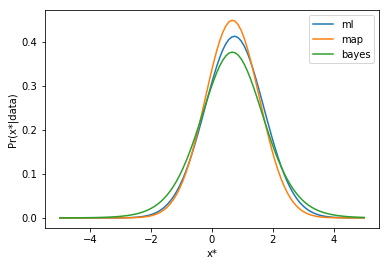

In [2]:
mu, var = 0., 1.
n_samples = 50
np.random.seed(0)
data = var * np.random.randn(n_samples) + mu
alpha, beta, gamma, delta = 1, 1, 1, 0
training_samples = data[:10]  # experiment with different values
#training_samples = self.data
mu_ml, var_ml = utils.learned_univariate_normal(training_samples, 'ml')
mu_map, var_map = utils.learned_univariate_normal(training_samples, 'map', alpha=alpha, beta=beta, gamma=gamma, delta=delta)
x = np.linspace(-5, 5, 100)
def norm(x, m, v):
    return 1. / np.sqrt(2*np.pi*v) * np.exp(-0.5 * (x - m)**2 / v)
plt.figure()
Pml = np.array([norm(_x, mu_ml, var_ml) for _x in x])
Pmap = np.array([norm(_x, mu_map, var_map) for _x in x])
Pbayes = np.empty_like(Pml)
for i in range(Pbayes.size):
    _, _, _, _, Pbayes[i] = utils.learned_univariate_normal(training_samples, 'bayes', alpha=alpha, beta=beta, gamma=gamma, delta=delta, x_star=x[i])
plt.plot(x, Pml, label='ml')
plt.plot(x, Pmap, label='map')
plt.plot(x, Pbayes, label='bayes')
plt.xlabel('x*')
plt.ylabel('Pr(x*|data)')
plt.legend()
plt.show()

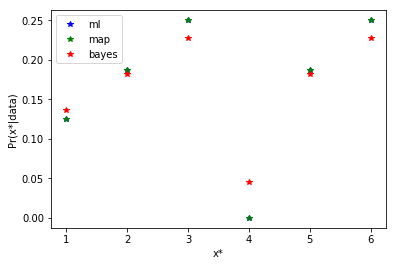

In [3]:
# loaded dice, there is 0 probability of observing 4
data = np.array([1, 1, 2, 2, 2, 3, 3, 3, 3, 5, 5, 5, 6, 6, 6 ,6])
n_outcomes = 6
alpha = np.ones((n_outcomes,))
N = len(data)
Pml = utils.learned_categorical(data, n_outcomes, 'ml')
Pmap = utils.learned_categorical(data, n_outcomes, 'map', alpha=alpha)
Pbayes = np.empty_like(Pmap)
for i in range(n_outcomes):
    a, Pbayes[i] = utils.learned_categorical(data, n_outcomes, 'bayes', alpha=alpha, x_star=i+1)
plt.figure()
x = [i+1 for i in range(n_outcomes)]
plt.plot(x, Pml, 'b*', label='ml')
plt.plot(x, Pmap, 'g*', label='map')
plt.plot(x, Pbayes, 'r*', label='bayes')
plt.ylabel('Pr(x*|data)')
plt.xlabel('x*')
plt.legend()
plt.show()

Bayes' method is more conservative than ML and MAP, just as described in the book.

## Problem 1
Let $L$ be the log-likelihood.  The objective is to find the $\hat \sigma^2$ that maximizes the log-likelihood given the data.

\begin{eqnarray}
0 = \frac{\partial L}{\partial \sigma^2} &=& \frac{\partial}{\partial \sigma^2} \bigl [ -\frac{I}{2} \log 2 \pi -\frac{I}{2} \log \sigma^2 -  \frac{1}{2 \sigma^2} \sum_{i=1}^I (x_i - \hat \mu)^2 \bigr ] \\
&=& -\frac{I}{2 \hat \sigma^2} + \frac{1}{2 (\hat \sigma^2)^2} \sum_{i=1}^I (x_i - \hat \mu)^2
\end{eqnarray}

It follows that

\begin{eqnarray}
\hat \sigma^2 I &=& \sum_{i=1}^I (x_i - \hat \mu)^2 \\
\hat \sigma^2 &=& \frac{\sum_{i=1}^I (x_i - \hat \mu)^2}{I},
\end{eqnarray}

where $\hat \mu$ is the optimal value found via setting $\frac{\partial L}{\partial \mu}$ equal to 0.

## Problem 2
Let $L_p$ be the log-posterior.  The objective is to find the $\hat \mu$ and $\hat \sigma^2$ that maximizes the log-posterior given the data.

\begin{eqnarray}
L_p &\triangleq& -\frac{1}{2} \log 2 \pi + \alpha \log \beta + \frac{1}{2} \log \gamma - \frac{I}{2} \log \sigma^2 -\frac{1}{2} \log \sigma^2 - \frac{1}{2 \sigma^2} \sum_{i=1}^I (x_i - \mu)^2 - \log \Gamma[\alpha] - (\alpha + 1) \log \sigma^2 - \frac{2 \beta + \gamma(\delta - \mu)^2}{2 \sigma^2} \\
0 &=& \frac{\partial L_p}{\partial \mu} = \frac{2 \gamma (\delta - \hat \mu)}{2 \hat \sigma^2} + \frac{1}{\hat \sigma^2} \sum_{i=1}^I (x_i - \hat \mu)\\
0 &=& \gamma \delta - \gamma \hat \mu + \sum_{i=1}^I x_i - I \hat \mu \\
(\gamma + I) \hat \mu &=& \gamma \delta + \sum_{i=1}^I x_i \\
\mu &=& \frac{\gamma \delta + \sum_{i=1}^I x_i}{\gamma + I} \\
0 &=& \frac{\partial L_p}{\partial \sigma^2} = -(2 \alpha + I + 3) + \frac{1}{\hat \sigma^2} \bigl ( \sum_{i=1}^I (x_i - \hat \mu)^2 + 2 \beta + \gamma(\delta - \hat \mu)^2 \bigr ) \\
(2 \alpha + I + 3) &=& \frac{1}{\hat \sigma^2} \bigl ( \sum_{i=1}^I (x_i - \hat \mu)^2 + 2 \beta + \gamma(\delta - \hat \mu)^2 \bigr ) \\
\hat \sigma^2 &=& \frac{\sum_{i=1}^I (x_i - \hat \mu)^2 + 2 \beta + \gamma(\delta - \hat \mu)^2}{2 \alpha + I + 3}
\end{eqnarray}

## Problem 3

\begin{eqnarray}
L &=& \sum_{k=1}^6 N_k \log \lambda_k + \nu \bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr ) \\
&\equiv& f(\lambda_{1 \cdots 6}) - \nu g(\lambda_{1 \cdots 6}) \\
f(\lambda_{1 \cdots 6}) &\triangleq& \sum_{k=1}^6 N_k \log \lambda_k \\
g(\lambda_{1 \cdots 6}) &\triangleq& -\bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr )
\end{eqnarray}

Where $\nu$ is the Lagrange multiplier used to enforce the constraint that the $\lambda_k$ must sum to 1.  The simultaneous equations to be solved are:

\begin{eqnarray}
\frac{\partial f}{\partial \lambda_k} &=& \nu \frac{\partial g}{\partial \lambda_k} \ \ k \in \{1 \cdots 6 \} \\
g(\lambda_{1 \cdots 6}) &=& 0 \\
\frac{N_k}{\lambda_k} &=& -\nu \\
\lambda_k &=& -\frac{N_k}{\nu}
\sum_{m=1}^6 \lambda_m - 1 &=& 0 \\
-\frac{1}{\nu} \sum_{m=1}^6 N_m &=& 1 \\
\nu &=& - \sum_{m=1}^6 N_m
\end{eqnarray}

Now, that we've found the $\nu$ for which the desired constraint is obeyed, plug it into $L$ above.

\begin{eqnarray}
L &=& \sum_{k=1}^6 N_k \log \lambda_k -\sum_{m=1}^6 N_m \bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr ) \\
0 &=& \frac{\partial L}{\partial \lambda_k} = \frac{N_k}{\hat \lambda_k} - \sum_{m=1}^6 N_m \\
\sum_{m=1}^6 N_m \hat \lambda_k &=& N_k \\
\hat \lambda_k &=& \frac{N_k}{\sum_{m=1}^6 N_m}
\end{eqnarray}

## Problem 4

\begin{eqnarray}
L &=& \sum_{k=1}^6 (N_k + \alpha_k - 1) \log \lambda_k + \nu \bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr ) \\
&\equiv& f(\lambda_{1 \cdots 6}) - \nu g(\lambda_{1 \cdots 6}) \\
f(\lambda_{1 \cdots 6}) &\triangleq& \sum_{k=1}^6 (N_k + \alpha_k - 1) \log \lambda_k \\
g(\lambda_{1 \cdots 6}) &\triangleq& -\bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr )
\end{eqnarray}

Where $\nu$ is the Lagrange multiplier used to enforce the constraint that the $\lambda_k$ must sum to 1.  The simultaneous equations to be solved are:

\begin{eqnarray}
\frac{\partial f}{\partial \lambda_k} &=& \nu \frac{\partial g}{\partial \lambda_k} \ \ k \in \{1 \cdots 6 \} \\
g(\lambda_{1 \cdots 6}) &=& 0 \\
\frac{(N_k + \alpha_k - 1)}{\lambda_k} &=& -\nu \\
\lambda_k &=& -\frac{(N_k + \alpha_k - 1)}{\nu}
\sum_{m=1}^6 \lambda_m - 1 &=& 0 \\
-\frac{1}{\nu} \sum_{m=1}^6 (N_m + \alpha_m - 1) &=& 1 \\
\nu &=& - \sum_{m=1}^6 (N_m + \alpha_m - 1)
\end{eqnarray}

Now, that we've found the $\nu$ for which the desired constraint is obeyed, plug it into $L$ above.

\begin{eqnarray}
L &=& \sum_{k=1}^6 (N_k + \alpha_k - 1) \log \lambda_k -(N_m + \alpha_m - 1) \bigl ( \sum_{k=1}^6 \lambda_k -1 \bigr ) \\
0 &=& \frac{\partial L}{\partial \lambda_k} = \frac{(N_k + \alpha_k - 1)}{\hat \lambda_k} - \sum_{m=1}^6 (N_m + \alpha_m - 1) \\
\sum_{m=1}^6 (N_m + \alpha_m - 1) \hat \lambda_k &=& (N_k + \alpha_k - 1) \\
\hat \lambda_k &=& \frac{N_k + \alpha_k - 1}{\sum_{m=1}^6 (N_m + \alpha_m - 1)}
\end{eqnarray}

## Problem 5

\begin{eqnarray}
Pr(x_{1 \cdots I}) &=& \int \prod_{i=1}^I Pr(x_i | \mathbf{\theta})Pr(\mathbf{\theta}) d \mathbf{\theta}
\end{eqnarray}

The right-hand-side of the above equation has the form of a conjugacy relationship (see Chapter 9, Problems 9-12).  It follows that:

\begin{eqnarray}
\int \prod_{i=1}^I Pr(x_i | \mathbf{\theta})Pr(\mathbf{\theta}) d \mathbf{\theta} &=& \int \kappa( x_{1 \cdots I}, \mathbf{p}) \text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}] d \mathbf{\theta},
\end{eqnarray}

where $\text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}]$ is a conjugate probability density function over $\mathbf{\theta}$ with parameters $\mathbf{\tilde p}$.  Since $\text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}]$ is a probability density function,

\begin{eqnarray}
\int \kappa( x_{1 \cdots I}, \mathbf{p}) \text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}] d \mathbf{\theta} &=& \int \kappa( x_{1 \cdots I}, \mathbf{p}) \text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}] d \mathbf{\theta} \\
&=& \kappa( x_{1 \cdots I}, \mathbf{p}) \int \text{Conj}_{\mathbf{\theta}}[\mathbf{\tilde p}] d \mathbf{\theta} \\
&=& \kappa ( x_{1 \cdots I}, \mathbf{p})
\end{eqnarray}

### (i) Univariate normal
$\mathbf{p} \triangleq (\alpha, \beta, \gamma, \delta)$ 

\begin{eqnarray}
\kappa &=& \frac{1}{(2 \pi)^\frac{I}{2}} \frac{\sqrt{\gamma} \beta^\alpha}{\sqrt{\tilde{\gamma}} \tilde{\beta}^{\tilde{\alpha}}} \frac{\Gamma[\tilde{\alpha}]}{\Gamma[\alpha]} \\
\tilde{\alpha} &=& \alpha + \frac{I}{2} \\
\tilde{\beta} &=& \frac{\sum_i x_i^2}{2} + \beta + \frac{\gamma \delta^2}{2} \\
\tilde{\gamma} &=& \gamma + I \\
\tilde{\delta} &=& \frac{\gamma \delta + \sum_i x_i}{I + \gamma}
\end{eqnarray}

### (ii) Categorical
$\mathbf{p} \triangleq (\alpha_{1 \cdots K})$ 

\begin{eqnarray}
\kappa &=& \frac{\Gamma \bigl [\sum_{k=1}^K \alpha_k \bigr ]}{\prod_{k=1}^K \Gamma[\alpha_k]} \cdot \frac{\prod_{k=1}^K \Gamma[\alpha_k + N_k]}{\Gamma \bigl [\sum_{k=1}^K \alpha_k + I \bigr ]} \\
\tilde{\alpha}_{1 \cdots K} &\equiv& [\alpha_1 + N_1, \cdots, \alpha_K + N_K]
\end{eqnarray}

## Problem 6
The probability $Pr(M_1 | S_1 \cup S_2) \approx 0.171$.  See code cell below.  The solutions manual neglects to include the $\frac{\Gamma[\tilde \alpha]}{\Gamma[\alpha]}$-term, so the answer below is different.  You can verify that the solutions manual value is recovered by uncommenting the line below.

In [4]:
S1 = np.array([0.1, -0.5, 0.2, 0.7])
S2 = np.array([1.1, 2.0, 1.4, 2.3])
S1_union_S2 = np.concatenate((S1, S2))

def normal_evidence(data, alpha, beta, _gamma, delta):
    sum_data = np.sum(data)
    sum_data_sq = np.sum([d**2 for d in data])
    I = float(data.size)
    alpha_tilde = alpha + 0.5 * I
    beta_tilde = 0.5 * sum_data_sq + beta + 0.5 * (_gamma * delta**2) - 0.5 * (_gamma * delta + sum_data)**2 / (_gamma + I)
    gamma_tilde = _gamma + I
    # the solutions manual appears to have missed the ratio of gamma functions, uncomment the next line to get the same solution
    #return 1 / ((2 * np.pi)**(0.5 * I)) * (np.sqrt(_gamma) / np.sqrt(gamma_tilde)) * (beta**alpha / beta_tilde**alpha_tilde)
    return 1 / ((2 * np.pi)**(0.5 * I)) * (np.sqrt(_gamma) / np.sqrt(gamma_tilde)) * (beta**alpha / beta_tilde**alpha_tilde) * (ss.gamma(alpha_tilde) / ss.gamma(alpha))

alpha, beta, _gamma, delta = 1., 1., 1., 0.
prob_S1 = normal_evidence(S1, alpha, beta, _gamma, delta)
#print(prob_S1)
prob_S2 = normal_evidence(S2, alpha, beta, _gamma, delta)
#print(prob_S2)
prob_S1_union_S2 = normal_evidence(S1_union_S2, alpha, beta, _gamma, delta)
#print(prob_S1_union_S2)
prob_M1_given_S1_union_S2 = prob_S1_union_S2 / (prob_S1_union_S2 + prob_S1 * prob_S2)
print(prob_M1_given_S1_union_S2)

0.17088374108546692


## Problem 7

\begin{eqnarray}
L &=& \sum_{i=1}^I x_i \log \lambda + \sum_{i=1}^I (1-x_i) \log [1 - \lambda] \\
0 = \frac{d L}{d \lambda} &=& \frac{1}{\hat \lambda} \sum_{i=1}^I x_i - \frac{1}{1 - \hat \lambda} \sum_{i=1}^I (1-x_i) \\
0 &=& \hat \lambda (1- \hat \lambda) \bigl [ \frac{1}{\hat \lambda} \sum_{i=1}^I x_i - \frac{1}{1 - \hat \lambda} \sum_{i=1}^I (1-x_i) \bigr ] \\
&=& (1 - \hat \lambda) \sum_{i=1}^I x_i - \hat \lambda \sum_{i=1}^I (1-x_i) \\
&=& \sum_{i=1}^I x_i - \hat \lambda \sum_{i=1}^I x_i  - \hat \lambda I + \hat \lambda \sum_{i=1}^I x_i \\
&=& \sum_{i=1}^I x_i - \hat \lambda I \\
\hat \lambda &=& \frac{\sum_{i=1}^I x_i}{I}
\end{eqnarray}

## Problem 8

\begin{eqnarray}
L_{p} &=& \log \kappa + \log \Gamma[\tilde \alpha + \tilde \beta ] - \log \Gamma[\tilde \alpha] - \log \Gamma[\tilde \beta] + (\tilde \alpha - 1) \log \lambda + (\tilde \beta - 1) \log [1 - \lambda] \\
0 = \frac{d L_p}{d \lambda} &=& \frac{1}{\hat \lambda} (\tilde \alpha - 1) - \frac{1}{1 - \hat \lambda} (\tilde \beta - 1) \\
0 &=& \hat \lambda (1 - \hat \lambda) \bigl [ \frac{1}{\hat \lambda} (\tilde \alpha - 1) - \frac{1}{1 - \hat \lambda} (\tilde \beta - 1) \bigr ] \\
&=& (1 - \hat \lambda)(\tilde \alpha - 1) - \hat \lambda (\tilde \beta - 1) \\
&=& \tilde\alpha - 1 + (2 - \tilde \alpha - \tilde \beta) \hat \lambda \\
\hat \lambda &=& \frac{\tilde \alpha - 1}{\tilde \alpha + \tilde \beta - 2}
\end{eqnarray}

Plugging in $\tilde \alpha, \tilde \beta$:

\begin{eqnarray}
\tilde \alpha &=& \alpha + \sum_{i=1}^I x_i \\
\tilde \beta &=& \beta + I - \sum_{i=1}^I x_i \\
\hat \lambda &=& \frac{\tilde \alpha - 1}{\tilde \alpha + \tilde \beta - 2} \\
&=& \frac{\alpha + \sum_{i=1}^I x_i - 1}{\alpha + \sum_{i=1}^I x_i + \beta + I - \sum_{i=1}^I x_i - 2} \\
&=& \frac{\alpha + \sum_{i=1}^I x_i - 1}{\alpha + \beta + I - 2}
\end{eqnarray}

## Problem 9
Follow the steps outlined in Sections 4.4.3 and 4.5.3, but for the Bernoulli distribution:
### (i) posterior

\begin{eqnarray}
Pr(\lambda | x_{1 \cdots I}) &=& \text{Beta}_\lambda [\tilde \alpha, \tilde \beta ]
&=& \frac{\Gamma[\tilde \alpha + \tilde \beta]}{\Gamma[\tilde \alpha] \Gamma[\tilde \beta]} \lambda^{\tilde \alpha -1} (1 - \lambda)^{\tilde \beta - 1}
\end{eqnarray}

where $\tilde \alpha, \tilde \beta$ are the same as in Problem 8:

\begin{eqnarray}
\tilde \alpha &=& \alpha + \sum_{i=1}^I x_i \\
\tilde \beta &=& \beta + I - \sum_{i=1}^I x_i
\end{eqnarray}

### (ii) predictive density
See Problem 3.9 and Pg. 25, Section 3.9:

\begin{eqnarray}
Pr(x^* | x_{1 \cdots I}) &=& \kappa(x^*, \tilde \alpha, \tilde \beta) \\
&=& \frac{\Gamma[\tilde \alpha + \tilde \beta]}{\Gamma[\tilde \alpha] \Gamma[\tilde \beta]} \frac{\Gamma[x^* + \tilde \alpha] \Gamma[1 - x^* + \tilde \beta]}{\Gamma[\tilde \alpha + \tilde \beta + 1]}
\end{eqnarray}

## Problem 10
### (i) ML
Use the result from Problem 7:

\begin{eqnarray}
\hat \lambda_{ML} &=& \frac{\sum_{i=1}^I x_i}{I} \\
&=& 0 \\
Pr(x^* = 0 | x_{1 \cdots I}) &=& 1 - \lambda_{ML} \\
&=& 1 \\
Pr(x^* = 1 | x_{1 \cdots I}) &=& \lambda_{ML} \\
&=& 0
\end{eqnarray}

### (ii) MAP
Use the result from Problem 8:

\begin{eqnarray}
\hat \lambda_{MAP} &=& \frac{\alpha + \sum_{i=1}^I x_i - 1}{\alpha + \beta + I - 2} \\
&=& \frac{1 - 0 -1}{1 + 1 + 4 -2}
&=& 0 \\
Pr(x^* = 0 | x_{1 \cdots I}) &=& 1 - \lambda_{MAP} \\
&=& 1 \\
Pr(x^* = 1 | x_{1 \cdots I}) &=& \lambda_{MAP} \\
&=& 0
\end{eqnarray}

### (iii) Bayes
Use result (ii) from Problem 9:

\begin{eqnarray}
\tilde \alpha &=& 1 + 0 = 1 \\
\tilde \beta &=& 1 + 4 - 0 = 5 \\
Pr(x^*=0 | x_{1 \cdots I}) &=& \frac{\Gamma[\tilde \alpha + \tilde \beta]}{\Gamma[\tilde \alpha] \Gamma[\tilde \beta]} \frac{\Gamma[x^* + \tilde \alpha] \Gamma[1 - x^* + \tilde \beta]}{\Gamma[\tilde \alpha + \tilde \beta + 1]} \\
&=& \frac{\Gamma[1 + 5]}{\Gamma[1] \Gamma[5]} \frac{\Gamma[0 + 1] \Gamma[1 - 0 + 5]}{\Gamma[1 + 5 + 1]} \\
&=& \frac{\Gamma^2[6]}{\Gamma[5] \Gamma[7]}
\end{eqnarray}

In [5]:
print(ss.gamma(6.)**2 / (ss.gamma(5) * ss.gamma(7)))

0.8333333333333334


\begin{eqnarray}
Pr(x^*=0 | x_{1 \cdots I}) &=& 0.8333 \\
Pr(x^*=1 | x_{1 \cdots I}) &=& 1 - Pr(x^*=0 | x_{1 \cdots I}) \\
&=& 0.1667
\end{eqnarray}

The results are typical of the results of the rest of the chapter: the ML and MAP distributions overfit to seen data while the Bayesian approach is more conservative.